In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from utils.functions import *
from build import morse_complex as mc

In [2]:
data = "data/roads_labels"
files = os.listdir(data)

In [3]:
img = np.load(data+"/"+files[0])

In [4]:
img.shape

(48, 48)

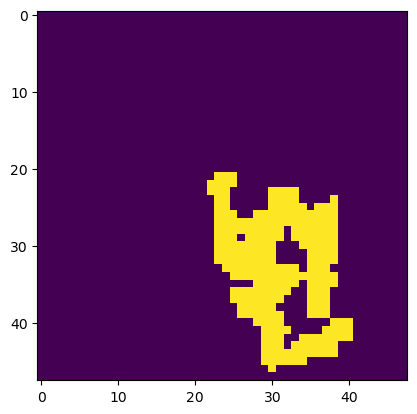

In [5]:
plt.imshow(img)

In [6]:
img2 = np.array([1-img])

In [7]:
img2.shape

(1, 48, 48)

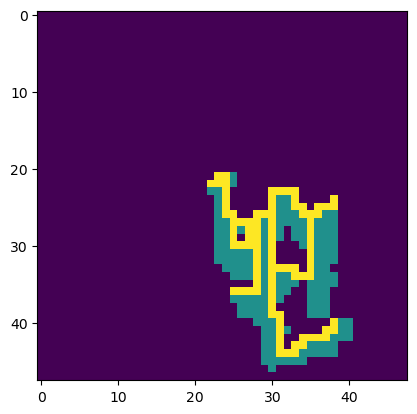

In [8]:
MC = mc.MorseComplex(img2)
MC.process_lower_stars()
MC.extract_morse_skeleton_below(1)
voxels = MC.get_morse_skeleton_below()
skel = np.zeros_like(img2)
for voxel in voxels:
    skel[voxel[0],voxel[1],voxel[2]] = 1
skel = skel[0,:,:]
plt.imshow(skel+img)

[[25, 32, 8, 0], [25, 26, 0, 0], [0, 6, 8, 0]]


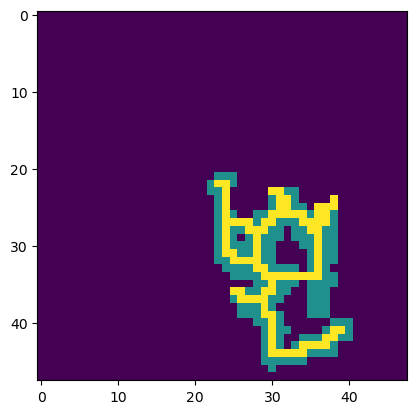

In [80]:
d = distance_transform(img2)
MC = mc.MorseComplex(d)
MC.process_lower_stars()
#MC.cancel_pairs_below_in_dim(1,0)
MC.extract_morse_skeleton_below(0)
voxels = MC.get_morse_skeleton_below()
skel = np.zeros_like(img2)
for voxel in voxels:
    skel[voxel[0],voxel[1],voxel[2]] = 1
skel = skel[0,:,:]
plt.imshow(skel+img)
print(MC.get_number_of_critical_cells(0))

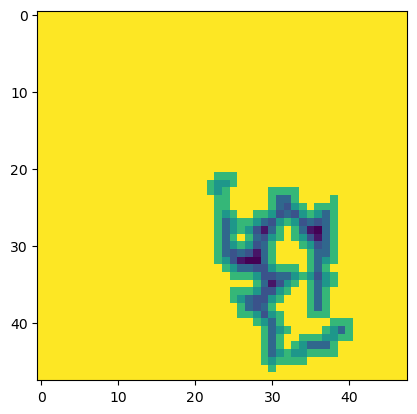

In [81]:
d_plot = d[0,:,:]
d_plot[d_plot > 0] = 0
plt.imshow(d_plot)

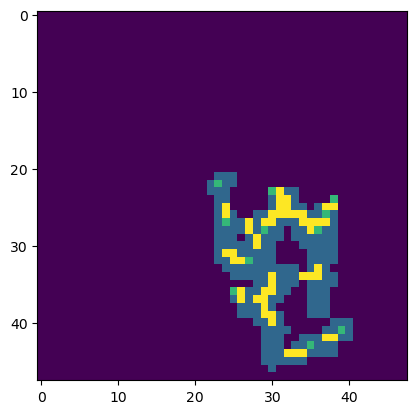

In [82]:
cells = MC.get_critical_cells()
critical = np.zeros_like(img)
for dim in [0,1]:
    critical_voxels = []
    for cell in cells[dim]:
        if cell.birth <= 0:
            critical_voxels.append(cell.get_voxels())
    for voxels in critical_voxels:
        for c in voxels:
            critical[c[1],c[2]] = dim+1
plt.imshow(critical+img)

In [91]:
m = -np.inf
i = -1
for index,cell in enumerate(cells[0]):
    if cell.birth > m:
        m = cell.birth
        i = index

print(cells[0][i])
coboundary = MC.get_morse_coboundary(cells[0][i])
print
m == np.inf
for b in boundary:
    if b[1] == 1 and b[0].birth <= 0:
        if b[0].birth < m:
            m = b[0].birth
            coboundary = b[0]
print(cell)       
j = -1
for index,cell in enumerate(cells[1]):
    if cell.get_voxels() == coboundary.get_voxels():
        j = index
        break


birth=-1.000000, x=0, y=23, z=30, type=0, dim=0
birth=-1.414214, x=0, y=44, z=33, type=0, dim=0


NameError: name 'coboundary' is not defined

In [ ]:
MC.cancel_pair(0,i,1,j)

In [83]:
cells[0]

[birth=-1.414214, x=0, y=22, z=23, type=0, dim=0,
 birth=-1.000000, x=0, y=23, z=30, type=0, dim=0,
 birth=-2.000000, x=0, y=24, z=31, type=0, dim=0,
 birth=-1.000000, x=0, y=24, z=38, type=0, dim=0,
 birth=-2.000000, x=0, y=27, z=24, type=0, dim=0,
 birth=-2.236068, x=0, y=25, z=32, type=0, dim=0,
 birth=-2.236068, x=0, y=26, z=31, type=0, dim=0,
 birth=-2.236068, x=0, y=26, z=33, type=0, dim=0,
 birth=-2.000000, x=0, y=26, z=37, type=0, dim=0,
 birth=-2.236068, x=0, y=27, z=30, type=0, dim=0,
 birth=-2.236068, x=0, y=27, z=34, type=0, dim=0,
 birth=-2.828427, x=0, y=28, z=29, type=0, dim=0,
 birth=-3.000000, x=0, y=28, z=36, type=0, dim=0,
 birth=-2.236068, x=0, y=31, z=25, type=0, dim=0,
 birth=-3.000000, x=0, y=32, z=27, type=0, dim=0,
 birth=-2.236068, x=0, y=34, z=36, type=0, dim=0,
 birth=-2.828427, x=0, y=35, z=30, type=0, dim=0,
 birth=-1.000000, x=0, y=36, z=25, type=0, dim=0,
 birth=-2.236068, x=0, y=36, z=29, type=0, dim=0,
 birth=-2.236068, x=0, y=37, z=28, type=0, dim=0,


In [70]:
i = 0
boundary = MC.get_morse_coboundary(cells[0][i])
boundary
for i,cell in enumerate(cells[1]):
    if cell.get_voxels() == boundary[0][0].get_voxels():
        print(cell)
        j = i
        break
MC.cancel_pair(0,i,1,j)

birth=-1.000000, x=0, y=25, z=24, type=1, dim=1


[[24, 31, 8, 0], [24, 25, 0, 0], [0, 6, 8, 0]]


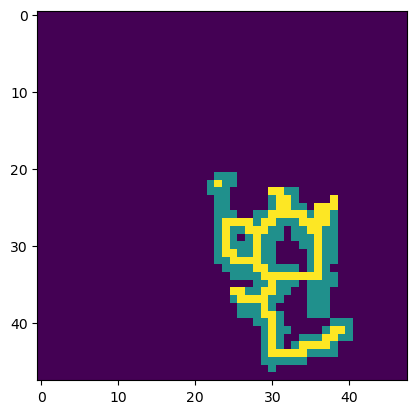

In [71]:
MC.extract_morse_skeleton_below(0)
voxels = MC.get_morse_skeleton_below()
skel = np.zeros_like(img2)
for voxel in voxels:
    skel[voxel[0],voxel[1],voxel[2]] = 1
skel = skel[0,:,:]
plt.imshow(skel+img)
print(MC.get_number_of_critical_cells(0))

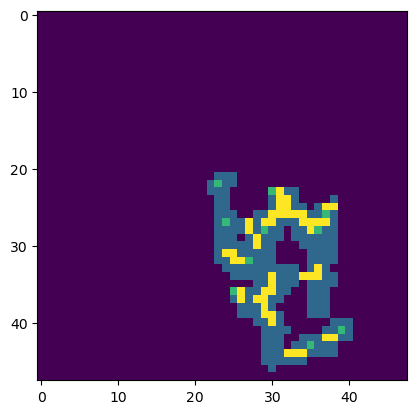

In [72]:
cells = MC.get_critical_cells()
critical = np.zeros_like(img)
for dim in [0,1]:
    critical_voxels = []
    for cell in cells[dim]:
        if cell.birth <= 0:
            critical_voxels.append(cell.get_voxels())
    for voxels in critical_voxels:
        for c in voxels:
            critical[c[1],c[2]] = dim+1
plt.imshow(critical+img)

In [73]:
cells[0]

[birth=-1.414214, x=0, y=22, z=23, type=0, dim=0,
 birth=-1.000000, x=0, y=23, z=30, type=0, dim=0,
 birth=-2.000000, x=0, y=24, z=31, type=0, dim=0,
 birth=-2.000000, x=0, y=27, z=24, type=0, dim=0,
 birth=-2.236068, x=0, y=25, z=32, type=0, dim=0,
 birth=-2.236068, x=0, y=26, z=31, type=0, dim=0,
 birth=-2.236068, x=0, y=26, z=33, type=0, dim=0,
 birth=-2.000000, x=0, y=26, z=37, type=0, dim=0,
 birth=-2.236068, x=0, y=27, z=30, type=0, dim=0,
 birth=-2.236068, x=0, y=27, z=34, type=0, dim=0,
 birth=-2.828427, x=0, y=28, z=29, type=0, dim=0,
 birth=-3.000000, x=0, y=28, z=36, type=0, dim=0,
 birth=-2.236068, x=0, y=31, z=25, type=0, dim=0,
 birth=-3.000000, x=0, y=32, z=27, type=0, dim=0,
 birth=-2.236068, x=0, y=34, z=36, type=0, dim=0,
 birth=-2.828427, x=0, y=35, z=30, type=0, dim=0,
 birth=-1.000000, x=0, y=36, z=25, type=0, dim=0,
 birth=-2.236068, x=0, y=36, z=29, type=0, dim=0,
 birth=-2.236068, x=0, y=37, z=28, type=0, dim=0,
 birth=-2.236068, x=0, y=39, z=29, type=0, dim=0,


In [74]:
i = 0
boundary = MC.get_morse_coboundary(cells[0][i])
boundary
for i,cell in enumerate(cells[1]):
    if cell.get_voxels() == boundary[0][0].get_voxels():
        print(cell)
        j = i
        break
MC.cancel_pair(0,i,1,j)

birth=2.236068, x=0, y=22, z=28, type=1, dim=1


[[23, 30, 8, 0], [23, 25, 0, 0], [0, 5, 8, 0]]


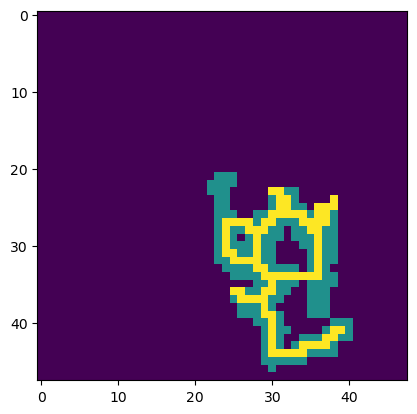

In [75]:
MC.extract_morse_skeleton_below(0)
voxels = MC.get_morse_skeleton_below()
skel = np.zeros_like(img2)
for voxel in voxels:
    skel[voxel[0],voxel[1],voxel[2]] = 1
skel = skel[0,:,:]
plt.imshow(skel+img)
print(MC.get_number_of_critical_cells(0))

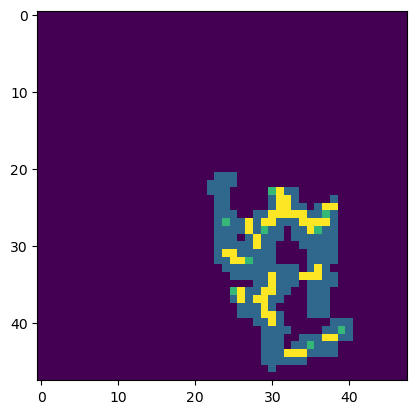

In [76]:
cells = MC.get_critical_cells()
critical = np.zeros_like(img)
for dim in [0,1]:
    critical_voxels = []
    for cell in cells[dim]:
        if cell.birth <= 0:
            critical_voxels.append(cell.get_voxels())
    for voxels in critical_voxels:
        for c in voxels:
            critical[c[1],c[2]] = dim+1
plt.imshow(critical+img)

In [77]:
cells[0]

[birth=-1.000000, x=0, y=23, z=30, type=0, dim=0,
 birth=-2.000000, x=0, y=24, z=31, type=0, dim=0,
 birth=-2.000000, x=0, y=27, z=24, type=0, dim=0,
 birth=-2.236068, x=0, y=25, z=32, type=0, dim=0,
 birth=-2.236068, x=0, y=26, z=31, type=0, dim=0,
 birth=-2.236068, x=0, y=26, z=33, type=0, dim=0,
 birth=-2.000000, x=0, y=26, z=37, type=0, dim=0,
 birth=-2.236068, x=0, y=27, z=30, type=0, dim=0,
 birth=-2.236068, x=0, y=27, z=34, type=0, dim=0,
 birth=-2.828427, x=0, y=28, z=29, type=0, dim=0,
 birth=-3.000000, x=0, y=28, z=36, type=0, dim=0,
 birth=-2.236068, x=0, y=31, z=25, type=0, dim=0,
 birth=-3.000000, x=0, y=32, z=27, type=0, dim=0,
 birth=-2.236068, x=0, y=34, z=36, type=0, dim=0,
 birth=-2.828427, x=0, y=35, z=30, type=0, dim=0,
 birth=-1.000000, x=0, y=36, z=25, type=0, dim=0,
 birth=-2.236068, x=0, y=36, z=29, type=0, dim=0,
 birth=-2.236068, x=0, y=37, z=28, type=0, dim=0,
 birth=-2.236068, x=0, y=39, z=29, type=0, dim=0,
 birth=-2.000000, x=0, y=40, z=30, type=0, dim=0,


In [78]:
i = 1
boundary = MC.get_morse_coboundary(cells[0][i])
boundary
for i,cell in enumerate(cells[1]):
    if cell.get_voxels() == boundary[0][0].get_voxels():
        print(cell)
        j = i
        break
MC.cancel_pair(0,i,1,j)

birth=-2.000000, x=0, y=24, z=32, type=1, dim=1


[[22, 29, 8, 0], [22, 24, 0, 0], [0, 5, 8, 0]]


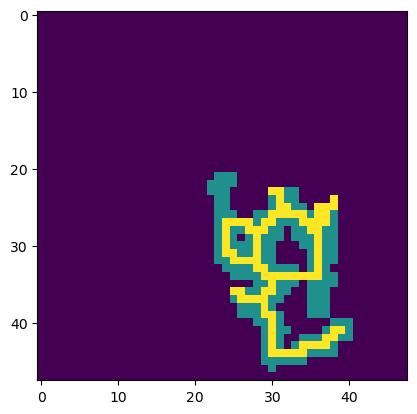

In [79]:
MC.extract_morse_skeleton_below(0)
voxels = MC.get_morse_skeleton_below()
skel = np.zeros_like(img2)
for voxel in voxels:
    skel[voxel[0],voxel[1],voxel[2]] = 1
skel = skel[0,:,:]
plt.imshow(skel+img)
print(MC.get_number_of_critical_cells(0))